<img src="../img/K-ICT_logo.jpg" width=50%>
<br>
<div align='center'><font size=5><b>분석 인프라 활용 AI 교육</b></font></div>
<br>
<div align='center'><font size=3>인공지능 빅데이터 전문가 심화과정</font></div>
<br>
<div align='right'>강사 <a href="https://open.kakao.com/me/minsuksung">성민석</a></div>
<div align='right'>minsuksung@korea.ac.kr</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#데이터-살펴보기" data-toc-modified-id="데이터-살펴보기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 살펴보기</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#피처-엔지니어링" data-toc-modified-id="피처-엔지니어링-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>피처 엔지니어링</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>모델링</a></span></li><li><span><a href="#모델-평가" data-toc-modified-id="모델-평가-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>모델 평가</a></span></li><li><span><a href="#결과-예측" data-toc-modified-id="결과-예측-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>결과 예측</a></span></li></ul></div>

<div align='center'><font size=3 color='red'><b>주의</b>: </font><font size=3><b>구글 콜랩</b>이나 <b>아나콘다</b>를 통해서 주피터 노트북을 실행해주세요!</font></div>

In [6]:
import os
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## 데이터 불러오기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [7]:
# !pip install finance-datareader
import FinanceDataReader as fdr

In [8]:
kospi = fdr.DataReader('KS11', '2000-01-01')
kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301
2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687
2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259
2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126
2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407
...,...,...,...,...,...,...
2021-08-02,3223.04,3218.42,3223.04,3194.00,561000000.0,0.0065
2021-08-03,3237.14,3221.57,3237.14,3213.20,653510000.0,0.0044
2021-08-04,3280.38,3246.65,3283.14,3237.55,632240000.0,0.0134


## 데이터 살펴보기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [9]:
kospi['Close']

Date
2000-01-04    1059.04
2000-01-05     986.31
2000-01-06     960.79
2000-01-07     948.65
2000-01-10     987.24
               ...   
2021-08-02    3223.04
2021-08-03    3237.14
2021-08-04    3280.38
2021-08-05    3276.13
2021-08-06    3270.36
Name: Close, Length: 5335, dtype: float64

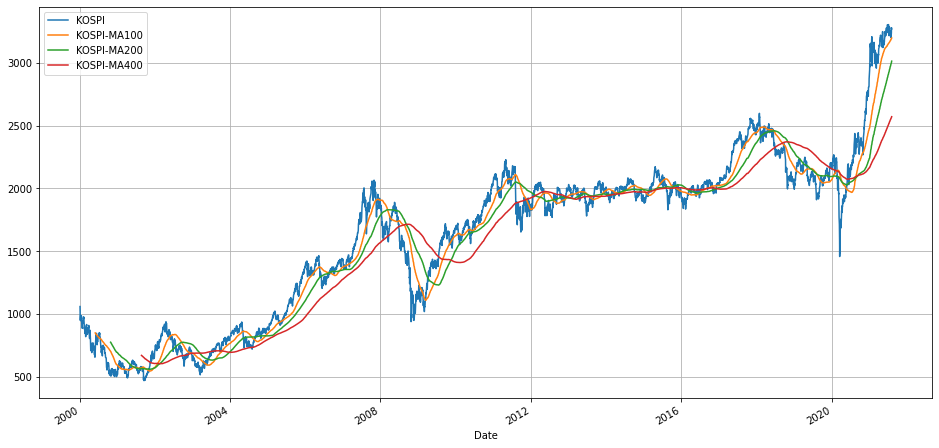

In [14]:
kospi['Close'].plot(figsize=(16,8))
kospi['Close'].rolling(100).mean().plot(figsize=(16,8))
kospi['Close'].rolling(200).mean().plot(figsize=(16,8))
kospi['Close'].rolling(400).mean().plot(figsize=(16,8))
plt.legend(['KOSPI','KOSPI-MA100','KOSPI-MA200','KOSPI-MA400'])
plt.grid(True)
plt.show()

## 데이터 전처리
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

## 피처 엔지니어링
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [16]:
df = pd.concat([kospi['Close'], *[kospi['Close'].shift(n+1) for n in range(60)]], axis=1).dropna()
df = df.loc['2000':]
df.columns = ['price'] + ['{}day before'.format(n+1) for n in range(60)]
df

,price,1day before,2day before,3day before,4day before,5day before,6day before,7day before,8day before,9day before,...,51day before,52day before,53day before,54day before,55day before,56day before,57day before,58day before,59day before,60day before
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-30,889.95,908.51,891.29,886.71,889.24,867.62,882.43,863.41,850.51,855.57,...,983.27,948.03,951.05,955.01,981.33,987.24,948.65,960.79,986.31,1059.04
2000-03-31,860.94,889.95,908.51,891.29,886.71,889.24,867.62,882.43,863.41,850.51,...,981.53,983.27,948.03,951.05,955.01,981.33,987.24,948.65,960.79,986.31
2000-04-03,846.44,860.94,889.95,908.51,891.29,886.71,889.24,867.62,882.43,863.41,...,938.78,981.53,983.27,948.03,951.05,955.01,981.33,987.24,948.65,960.79
2000-04-04,830.16,846.44,860.94,889.95,908.51,891.29,886.71,889.24,867.62,882.43,...,945.90,938.78,981.53,983.27,948.03,951.05,955.01,981.33,987.24,948.65
2000-04-06,804.35,830.16,846.44,860.94,889.95,908.51,891.29,886.71,889.24,867.62,...,925.16,945.90,938.78,981.53,983.27,948.03,951.05,955.01,981.33,987.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,3223.04,3202.32,3242.65,3236.86,3232.53,3224.95,3254.42,3250.21,3215.91,3232.70,...,3156.42,3162.28,3173.05,3134.52,3153.32,3122.11,3161.66,3209.43,3249.30,3197.20
2021-08-03,3237.14,3223.04,3202.32,3242.65,3236.86,3232.53,3224.95,3254.42,3250.21,3215.91,...,3144.30,3156.42,3162.28,3173.05,3134.52,3153.32,3122.11,3161.66,3209.43,3249.30
2021-08-04,3280.38,3237.14,3223.04,3202.32,3242.65,3236.86,3232.53,3224.95,3254.42,3250.21,...,3171.32,3144.30,3156.42,3162.28,3173.05,3134.52,3153.32,3122.11,3161.66,3209.43


## 모델링
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [17]:
train = df.loc['2000':'2018']
train

,price,1day before,2day before,3day before,4day before,5day before,6day before,7day before,8day before,9day before,...,51day before,52day before,53day before,54day before,55day before,56day before,57day before,58day before,59day before,60day before
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-30,889.95,908.51,891.29,886.71,889.24,867.62,882.43,863.41,850.51,855.57,...,983.27,948.03,951.05,955.01,981.33,987.24,948.65,960.79,986.31,1059.04
2000-03-31,860.94,889.95,908.51,891.29,886.71,889.24,867.62,882.43,863.41,850.51,...,981.53,983.27,948.03,951.05,955.01,981.33,987.24,948.65,960.79,986.31
2000-04-03,846.44,860.94,889.95,908.51,891.29,886.71,889.24,867.62,882.43,863.41,...,938.78,981.53,983.27,948.03,951.05,955.01,981.33,987.24,948.65,960.79
2000-04-04,830.16,846.44,860.94,889.95,908.51,891.29,886.71,889.24,867.62,882.43,...,945.90,938.78,981.53,983.27,948.03,951.05,955.01,981.33,987.24,948.65
2000-04-06,804.35,830.16,846.44,860.94,889.95,908.51,891.29,886.71,889.24,867.62,...,925.16,945.90,938.78,981.53,983.27,948.03,951.05,955.01,981.33,987.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2061.49,2060.12,2078.84,2062.11,2071.09,2069.38,2095.55,2082.57,2052.97,2053.79,...,2129.67,2228.61,2253.83,2267.52,2274.49,2309.57,2338.88,2343.07,2355.43,2339.17
2018-12-24,2055.01,2061.49,2060.12,2078.84,2062.11,2071.09,2069.38,2095.55,2082.57,2052.97,...,2161.85,2129.67,2228.61,2253.83,2267.52,2274.49,2309.57,2338.88,2343.07,2355.43
2018-12-26,2028.01,2055.01,2061.49,2060.12,2078.84,2062.11,2071.09,2069.38,2095.55,2082.57,...,2145.12,2161.85,2129.67,2228.61,2253.83,2267.52,2274.49,2309.57,2338.88,2343.07


In [18]:
test = df.loc['2018':]
test

,price,1day before,2day before,3day before,4day before,5day before,6day before,7day before,8day before,9day before,...,51day before,52day before,53day before,54day before,55day before,56day before,57day before,58day before,59day before,60day before
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2479.65,2467.49,2436.67,2427.34,2440.54,2429.83,2472.37,2478.53,2481.88,2482.07,...,2482.91,2484.37,2480.05,2473.62,2474.76,2458.16,2433.81,2394.47,2373.14,2372.57
2018-01-03,2486.35,2479.65,2467.49,2436.67,2427.34,2440.54,2429.83,2472.37,2478.53,2481.88,...,2473.06,2482.91,2484.37,2480.05,2473.62,2474.76,2458.16,2433.81,2394.47,2373.14
2018-01-04,2466.46,2486.35,2479.65,2467.49,2436.67,2427.34,2440.54,2429.83,2472.37,2478.53,...,2489.54,2473.06,2482.91,2484.37,2480.05,2473.62,2474.76,2458.16,2433.81,2394.47
2018-01-05,2497.52,2466.46,2486.35,2479.65,2467.49,2436.67,2427.34,2440.54,2429.83,2472.37,...,2490.05,2489.54,2473.06,2482.91,2484.37,2480.05,2473.62,2474.76,2458.16,2433.81
2018-01-08,2513.28,2497.52,2466.46,2486.35,2479.65,2467.49,2436.67,2427.34,2440.54,2429.83,...,2490.49,2490.05,2489.54,2473.06,2482.91,2484.37,2480.05,2473.62,2474.76,2458.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,3223.04,3202.32,3242.65,3236.86,3232.53,3224.95,3254.42,3250.21,3215.91,3232.70,...,3156.42,3162.28,3173.05,3134.52,3153.32,3122.11,3161.66,3209.43,3249.30,3197.20
2021-08-03,3237.14,3223.04,3202.32,3242.65,3236.86,3232.53,3224.95,3254.42,3250.21,3215.91,...,3144.30,3156.42,3162.28,3173.05,3134.52,3153.32,3122.11,3161.66,3209.43,3249.30
2021-08-04,3280.38,3237.14,3223.04,3202.32,3242.65,3236.86,3232.53,3224.95,3254.42,3250.21,...,3171.32,3144.30,3156.42,3162.28,3173.05,3134.52,3153.32,3122.11,3161.66,3209.43


In [19]:
X = train.drop(['price'], axis=1)
y = train[['price']]

In [20]:
selected_feature = ['1day before', '2day before', '3day before']

In [21]:
X_train, X_valid, y_train, y_valid = X.loc[:'2016',selected_feature], X.loc['2016':,selected_feature], y.loc[:'2016'], y.loc['2016':]

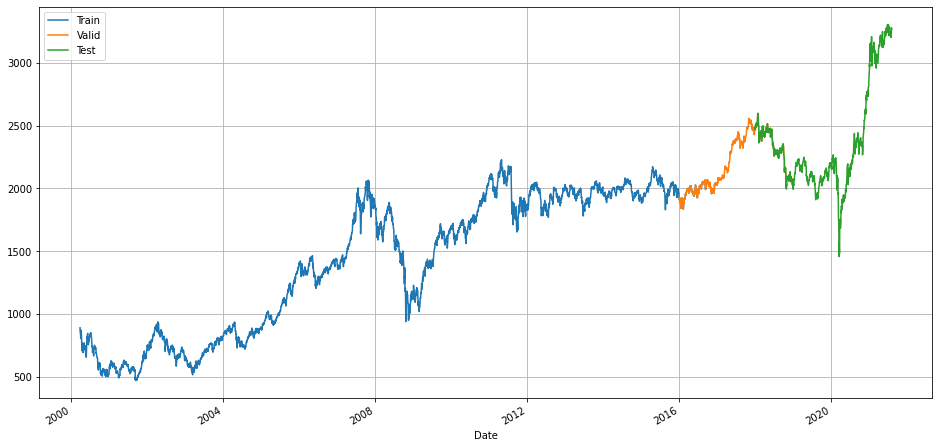

In [25]:
y_train['price'].plot(figsize=(16,8))
y_valid['price'].plot(figsize=(16,8))
test['price'].plot(figsize=(16,8))
plt.legend(['Train','Valid', 'Test'])
plt.grid(True)
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
X_train

,1day before,2day before,3day before
Date,,,
2000-03-30,908.51,891.29,886.71
2000-03-31,889.95,908.51,891.29
2000-04-03,860.94,889.95,908.51
2000-04-04,846.44,860.94,889.95
2000-04-06,830.16,846.44,860.94
...,...,...,...
2016-12-23,2035.73,2037.96,2041.94
2016-12-26,2035.90,2035.73,2037.96
2016-12-27,2037.75,2035.90,2035.73


In [53]:
model.fit(X_train,y_train['price'])

LinearRegression()

## 모델 평가
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [54]:
model.score(X_valid, y_valid['price'])

0.9931082049166222

In [55]:
y_pred = pd.DataFrame(model.predict(X_valid), y_valid.index, columns=['price'])
y_pred

,price
Date,
2016-01-04,1961.099056
2016-01-05,1917.896271
2016-01-06,1932.044865
2016-01-07,1924.958509
2016-01-08,1903.985368
...,...
2018-12-21,2059.104087
2018-12-24,2061.986557
2018-12-26,2054.736386


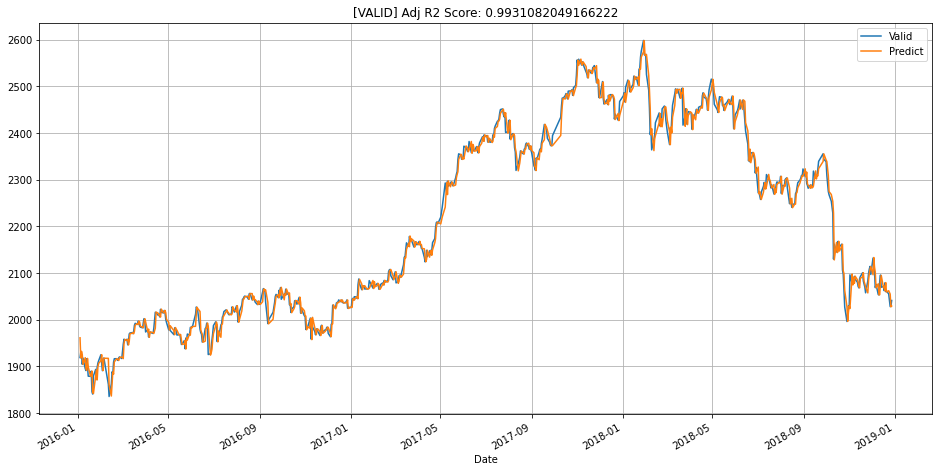

In [56]:
# y_train.plot(figsize=(16,8))
y_valid['price'].plot(figsize=(16,8))
y_pred['price'].plot(figsize=(16,8))
plt.legend(['Valid', 'Predict'])
plt.title("[VALID] Adj R2 Score: {}".format(model.score(X_valid, y_valid['price'])))
plt.grid(True)
plt.show()

In [57]:
submission = pd.DataFrame(model.predict(test[selected_feature]), test.index, columns=['price'])
submission

,price
Date,
2018-01-02,2467.631736
2018-01-03,2478.713985
2018-01-04,2485.826990
2018-01-05,2465.478448
2018-01-08,2498.505486
...,...
2021-08-02,3200.461855
2021-08-03,3223.965537
2021-08-04,3236.114004


## 결과 예측
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

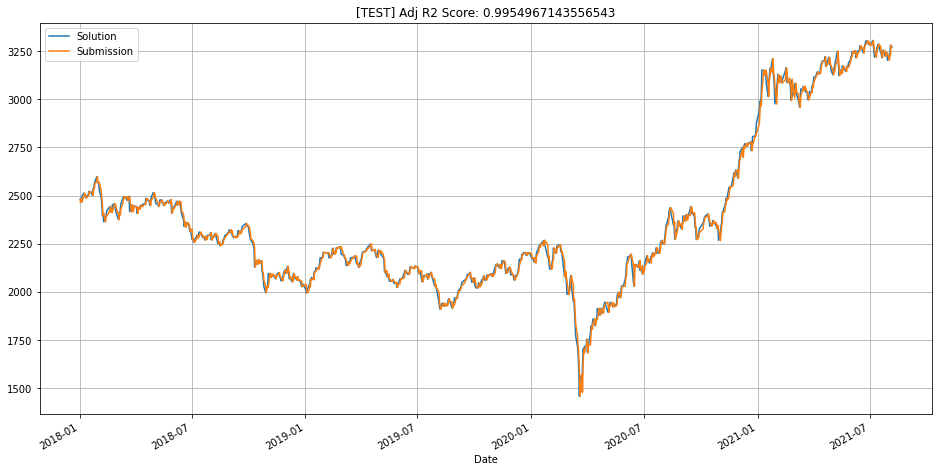

In [36]:
test['price'].plot(figsize=(16,8))
submission['price'].plot(figsize=(16,8))
plt.legend(['Solution','Submission'])
plt.title("[TEST] Adj R2 Score: {}".format(model.score(test[selected_feature], test['price'])))
plt.grid(True)
plt.show()